In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/ML/Bootcamp/Assignment6

/content/drive/My Drive/ML/Bootcamp/Assignment6


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import time
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

from itertools import cycle

import matplotlib.cm as cm

from sklearn.metrics import pairwise_distances

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


#Data

##Create Data

In [20]:
boston2014 = pd.read_csv('results.csv')
pd.set_option('display.max_columns', None)
print(boston2014.head())

     10k                name  division    25k gender  age  official bib  \
0  17.37  Yamamoto, Hiroyuki         8  47.67      M   47     85.25  W1   
1  32.58        Jeptoo, Rita         1  82.43      F   33    138.95  F1   
2  16.62   Van Dyk, Ernst F.         1   45.8      M   41     80.60  W2   
3  32.57        Dibaba, Mare         3  82.43      F   24    140.58  F2   
4  17.12      Hokinoue, Kota         2  46.37      M   40     81.23  W3   

   genderdiv  ctz     35k  overall  pace state    30k     5k   half    20k  \
0          8  NaN    71.4        8  3.27   NaN  59.18   8.02  39.72  37.65   
1          1  NaN  116.37       21  5.30   NaN  99.33  16.22  69.47  65.83   
2          1  NaN   67.42        1  3.08   NaN  56.45   7.75  38.03   36.1   
3          3  NaN  116.37       27  5.37   NaN  99.33   16.2  69.47  65.83   
4          2  NaN   67.83        2  3.10   NaN  57.03   8.02   38.6  36.58   

  country            city     40k  
0     JPN         Fukuoka   80.43  
1     KE

In [ ]:
boston2014['gender_bin'] = boston2014['gender'].str.replace('M','0')
boston2014['gender_bin'] = boston2014['gender'].str.replace('F','1')
boston2014['gender_bin'] = pd.to_numeric(boston2014['gender_bin'], errors='coerce')

In [7]:
enc = OneHotEncoder(sparse = False)

boston2014['gender_bin'] = boston2014['gender']
boston2014['gender']= enc.fit_transform(boston2014[['gender']])

In [8]:
boston2014

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,gender_bin
0,17.37,"Yamamoto, Hiroyuki",8,47.67,0.0,47,85.25,W1,8,NaN,71.4,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,M
1,32.58,"Jeptoo, Rita",1,82.43,1.0,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.1,F
2,16.62,"Van Dyk, Ernst F.",1,45.8,0.0,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.1,RSA,Paarl,76.1,M
3,32.57,"Dibaba, Mare",3,82.43,1.0,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.2,69.47,65.83,ETH,Shoa,132.95,F
4,17.12,"Hokinoue, Kota",2,46.37,0.0,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.6,36.58,JPN,Nogata Fukuoka,76.72,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,50.72,"Anderson, Steve K.",3414,124.02,0.0,32,211.75,35908,7500,NaN,174.9,9849,8.08,CA,148.65,26.13,104.78,99.55,USA,Larkspur,200.22,M
31980,61.28,"McCarthy, Michael P.",5212,165.02,0.0,34,302.52,35909,15459,NaN,244.7,27456,11.55,MA,203.43,31.07,135.85,128.37,USA,Norwell,285.47,M
31981,59,"Brimmer, Delia C.",5231,157.02,1.0,21,282.00,35910,10788,NaN,229.62,25092,10.77,CT,192.65,28.18,130.57,123.33,USA,West Simsbury,266.3,F
31982,63.75,"Morganthal, Amy",5800,167.82,1.0,38,302.73,35911,12009,NaN,247.18,27476,11.55,MA,207.52,30.98,137.03,129.9,USA,North Andover,285.87,F


##Drop unnecessary data

In [9]:
# Drop the "ctz" column, replace nan in "state" column with 'unknown', replace '-' in the
# "_k" columns with 0
boston2014.drop('ctz', axis=1, inplace=True)
boston2014.replace(np.nan, 'unknown', inplace=True, regex=True)
boston2014.replace('-', 0, inplace=True, regex=True)

In [10]:
# Setup X and y variables for modeling, drop name from predictors as it will not be helpful
X = boston2014.drop(['overall', 'name'], axis=1)

# Normalize both target and predictors
X_norm = MinMaxScaler().fit_transform(X[['10k', 'division', '25k', 'age', 'official', 'genderdiv', '35k', 'pace', '30k', '5k', 'half', '20k', '40k']])
y_norm = MinMaxScaler().fit_transform(boston2014[['overall']])

##Tranform to PCA

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

In [ ]:
X_pca

array([[-1.01709625, -0.01588682],
       [-0.78877195, -0.11041415],
       [-1.03757657, -0.08240938],
       ...,
       [ 0.43394546, -0.47678339],
       [ 0.59856962, -0.31798884],
       [ 0.01945798,  0.19655595]])

In [12]:
import itertools

y_norm = np.array(list(itertools.chain.from_iterable(y_norm)))

#Run different KMeans 

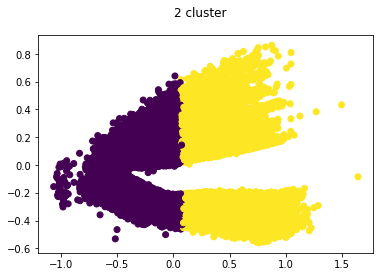

Euclidean: 0.445428095094686



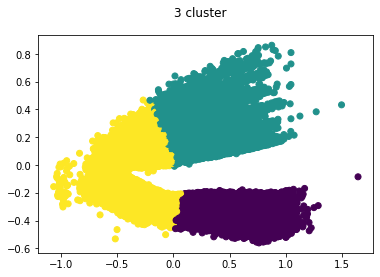

Euclidean: 0.4588256596184716



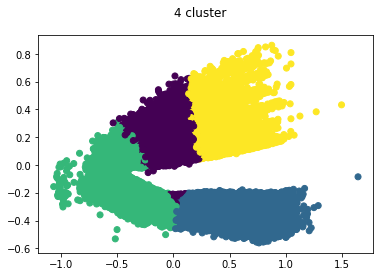

Euclidean: 0.4067687135516548



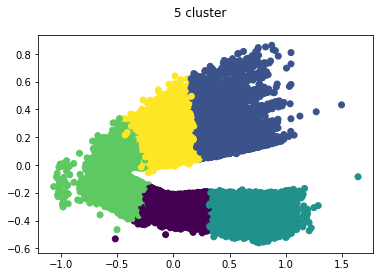

Euclidean: 0.42841067840416397



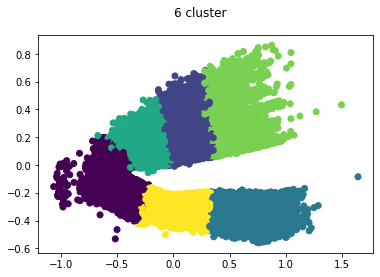

Euclidean: 0.40461016912316844



In [18]:
for cluster in range(2,7):
  # Make a grid of subplots.
    # f, axarr = plt.subplots(2, 2)
    
    best_kmean = KMeans(n_clusters=cluster, init='k-means++', max_iter=300, n_init=10,
                    tol=0.0001, n_jobs=-1, random_state=5588)
    y_pred = best_kmean.fit_predict(X_norm)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    plt.suptitle('{} cluster'.format(cluster))
    plt.show()
    labels = best_kmean.labels_
    euclidean = metrics.silhouette_score(X_pca, labels, metric='euclidean')
    print(f"Euclidean: {euclidean}\n")

##Create KMeans model with ideal 3 clusters and evaluate entired data set

In [19]:
best_kmean = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,
                    tol=0.0001, n_jobs=-1, random_state=5588)
y_pred = best_kmean.fit_predict(X_norm)

It appears to me that 3 clusters provides the best balance of number of clusters and consistency across data subsets. 4 clusters is also pretty good. Once you get above 4 clusters, boundaries start to shift a lot more.

Looks like the 3 cluster model wins just slightly over the 2 cluster. The scores are all pretty consistent across the 4 subsets of the data as well, which is positive.

In [ ]:
boston2014['cluster'] = y_pred + 1

In [ ]:
# Need all of our time columns to be numeric not objects
dist_col = ['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official']
for column in dist_col:
    boston2014[column] = boston2014[column].astype(float)

In [ ]:
boston2014

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,gender_bin,cluster
0,17.37,"Yamamoto, Hiroyuki",8,47.67,0.0,47,85.25,W1,8,71.40,8,3.27,unknown,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,M,3
1,32.58,"Jeptoo, Rita",1,82.43,1.0,33,138.95,F1,1,116.37,21,5.30,unknown,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,F,3
2,16.62,"Van Dyk, Ernst F.",1,45.80,0.0,41,80.60,W2,1,67.42,1,3.08,unknown,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,M,3
3,32.57,"Dibaba, Mare",3,82.43,1.0,24,140.58,F2,3,116.37,27,5.37,unknown,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,F,3
4,17.12,"Hokinoue, Kota",2,46.37,0.0,40,81.23,W3,2,67.83,2,3.10,unknown,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,M,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,50.72,"Anderson, Steve K.",3414,124.02,0.0,32,211.75,35908,7500,174.90,9849,8.08,CA,148.65,26.13,104.78,99.55,USA,Larkspur,200.22,M,3
31980,61.28,"McCarthy, Michael P.",5212,165.02,0.0,34,302.52,35909,15459,244.70,27456,11.55,MA,203.43,31.07,135.85,128.37,USA,Norwell,285.47,M,1
31981,59.00,"Brimmer, Delia C.",5231,157.02,1.0,21,282.00,35910,10788,229.62,25092,10.77,CT,192.65,28.18,130.57,123.33,USA,West Simsbury,266.30,F,1
31982,63.75,"Morganthal, Amy",5800,167.82,1.0,38,302.73,35911,12009,247.18,27476,11.55,MA,207.52,30.98,137.03,129.90,USA,North Andover,285.87,F,1


##Run Times (5k, 10k, 20k, half, 25k, 30k, 35k, 40k, official)

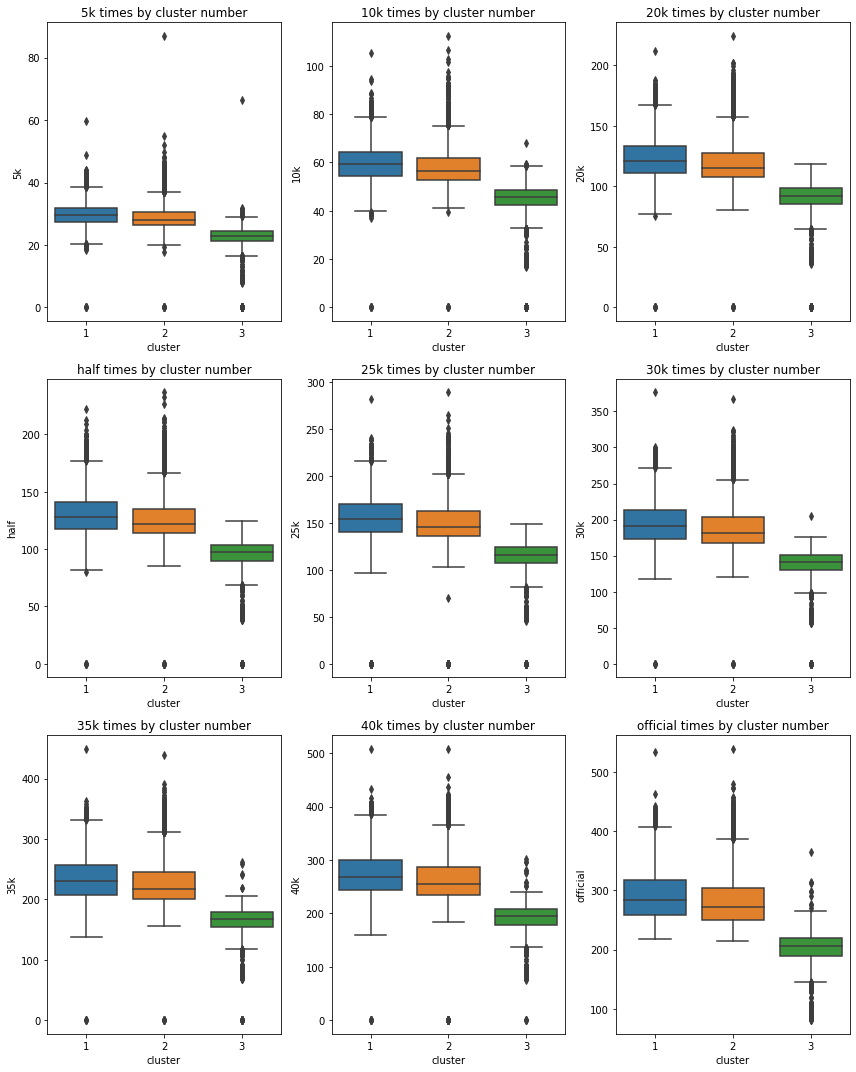

In [ ]:
plt.figure(figsize=(12, 15))

for dist in dist_col:
    plt.subplot(3, 3, dist_col.index(dist)+1)
    sns.boxplot(x='cluster', y=dist, data=boston2014)
    plt.title('{} times by cluster number'.format(dist))
    
plt.tight_layout()
plt.show()

The configuration of the boxplots remains impressively consistent across all measures of distance. Runners in cluster 3 tend to be much faster than cluster 1 or 2. Cluster 2 tends to be a bit faster than cluster 1.

Next we'll look at gender, starting with the distribution for each cluster.

##Gender

In [ ]:
# need to find percentage of men and women per cluster.
gender = pd.DataFrame(columns=['F', 'M'])
gender.loc['cluster_1'] = boston2014[boston2014['cluster']==1].groupby('gender_bin').count()['cluster']/boston2014[boston2014['cluster']==1].count()['cluster']
gender.loc['cluster_2'] = boston2014[boston2014['cluster']==2].groupby('gender_bin').count()['cluster']/boston2014[boston2014['cluster']==2].count()['cluster']
gender.loc['cluster_3'] = boston2014[boston2014['cluster']==3].groupby('gender_bin').count()['cluster']/boston2014[boston2014['cluster']==3].count()['cluster']

In [ ]:
gender

,F,M
cluster_1,0.592805,0.407195
cluster_2,0.389725,0.610275
cluster_3,0.438256,0.561744


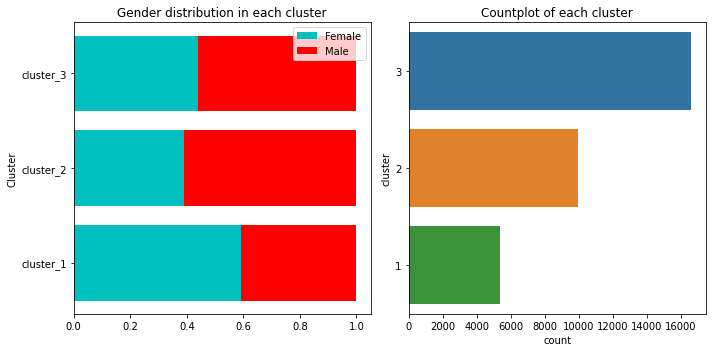

In [ ]:
plt.subplots(1, 2, figsize=(10, 5))

# Stacked horizontal bar chart of percentages
plt.subplot(1, 2, 1)
plt.barh(gender.index, gender.F, color='c', label='Female')
plt.barh(gender.index, gender.M, left=gender.F, color='r', label='Male')
plt.title('Gender distribution in each cluster')
plt.ylabel('Cluster')
plt.legend()

# Countplot of clusters
plt.subplot(1, 2, 2)
sns.countplot(y='cluster', data=boston2014, order=[3, 2, 1])
plt.title("Countplot of each cluster")
plt.tight_layout()
plt.show()

Interesting results here. We can see there are many more marathon participants who are male - clusters 2 and 3, both predominantly male, have the higher member counts. Female participants are only the majority in cluster 1, which has the lowest member count of the 3.

I'm also curious to see what the run times plots we created above look like when the two genders are separated.

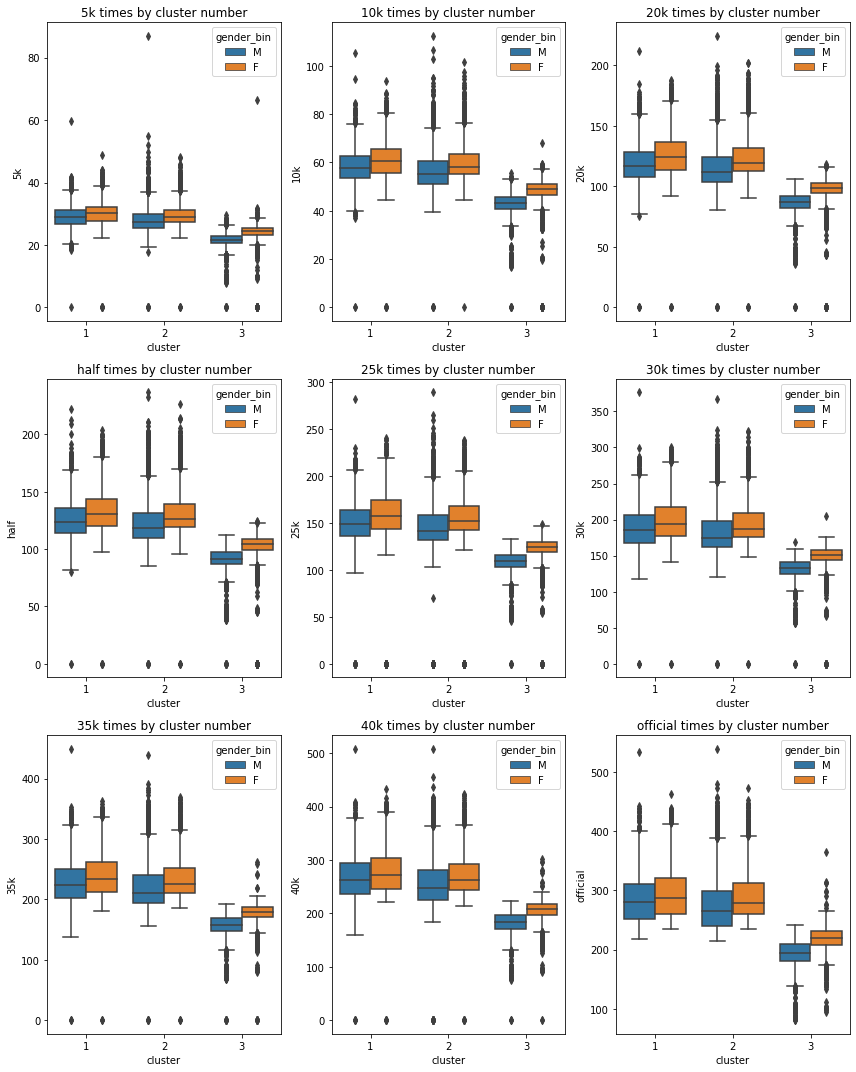

In [ ]:
plt.figure(figsize=(12, 15))

for dist in dist_col:
    plt.subplot(3, 3, dist_col.index(dist)+1)
    sns.boxplot(x='cluster', y=dist, hue='gender_bin', data=boston2014)
    plt.title('{} times by cluster number'.format(dist))
    
plt.tight_layout()
plt.show()

Here we see that male runners have consistently lower median times in all distance groupings than female runners for each of the 3 clusters. There is a greater gender discrepancy in cluster 3 than 1 or 2. And the IQR is shorter for cluster 3.

We still haven't found anything that greatly differentiates clusters 1 and 2. Hopefully we'll find something next, as we continue our bivariate plots with the 'cluster' feature and the remaining columns.

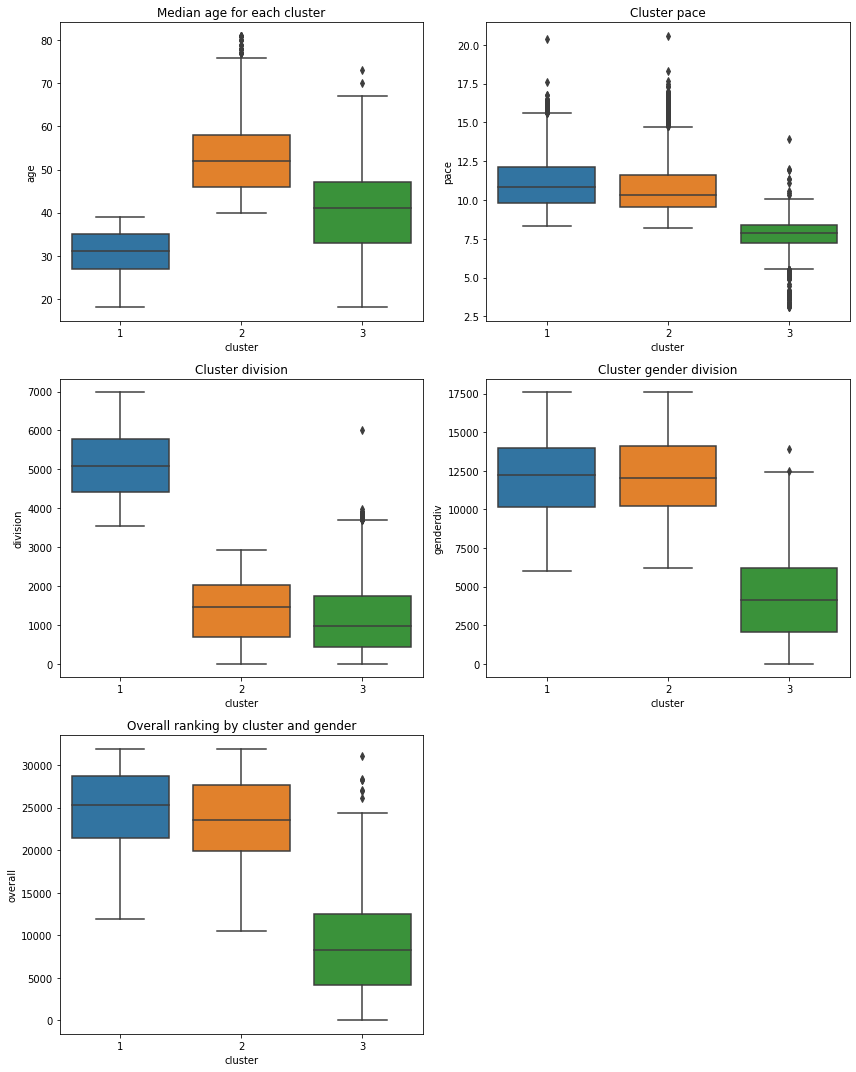

In [ ]:
plt.figure(figsize=(12, 15))

plt.subplot(3, 2, 1)
sns.boxplot(x='cluster', y='age', data=boston2014)
plt.title('Median age for each cluster')

plt.subplot(3, 2, 2)
sns.boxplot(x='cluster', y='pace', data=boston2014)
plt.title('Cluster pace')

plt.subplot(3, 2, 3)
sns.boxplot(x='cluster', y='division', data=boston2014)
plt.title('Cluster division')

plt.subplot(3, 2, 4)
sns.boxplot(x='cluster', y='genderdiv', data=boston2014)
plt.title('Cluster gender division')

plt.subplot(3, 2, 5)
sns.boxplot(x='cluster', y='overall', data=boston2014)
plt.title('Overall ranking by cluster and gender')

plt.tight_layout()
plt.show()


###Age

Cluster 1 represents participants under 40, cluster 2 is over 40, including outliers that stretch above 76/77 years old. Cluster 3 seems to run the entire range of ages but doesn't reach quite as high as cluster 2, having a few outliers as well going into the mid-70's.

###Pace

Pace reflects the same trend as the run times for each distance, as we would expect, being a measure of time taken to run a given distance. Cluster 3 is the lowest time, clusters 1 and 2 are very close, but 2 has a slightly lower median value. The boxplots have many outliers, all three have some above, cluster 3 is the only with outliers below the IQR.

###Division

The measure of a runner's rank in their division. Cluster 3 holds the lowest values or highest median division ranks, but cluster 2 is also very close. Here is another clear differentiation of clusters 1 and 2: 2 tends toward better division rank. Cluster 3 has a few outliers above the IQR.

###Gender Division

The measure of a runner's rank in their gender division. The gender division rank is pretty stable between clusters 1 and 2, but cluster 3 averages much lower values/higher ranks. Cluster 3 has a few outliers above the IQR.

###Overall

Overall rank of racers for the clusters follows the same trend as times: cluster 3 has the lowest values (highest ranks), clusters 1 and 2 are a bit higher up on the plot, the latter having just a slightly lower median

Cluster 1 represents participants under 40, cluster 2 is over 40, including outliers that stretch above 76/77 years old. Cluster 3 seems to run the entire range of ages but doesn't reach quite as high as cluster 2, having a few outliers as well going into the mid-70's.


##State

In [ ]:
states = pd.DataFrame()
states['state'] = sorted(boston2014.state.unique())
states['cluster_1'] = np.array(boston2014[boston2014['cluster']==1].groupby('state').count()['cluster'] / boston2014.groupby('state').count()['cluster'])
states['cluster_2'] = np.array(boston2014[boston2014['cluster']==2].groupby('state').count()['cluster'] / boston2014.groupby('state').count()['cluster'])
states['cluster_3'] = np.array(boston2014[boston2014['cluster']==3].groupby('state').count()['cluster'] / boston2014.groupby('state').count()['cluster'])
states.fillna(0, inplace=True)
states.head()

,state,cluster_1,cluster_2,cluster_3
0,AA,0.000000,0.000000,1.000000
1,AB,0.038647,0.304348,0.657005
2,AE,0.000000,0.285714,0.714286
3,AK,0.060000,0.260000,0.680000
4,AL,0.076190,0.419048,0.504762


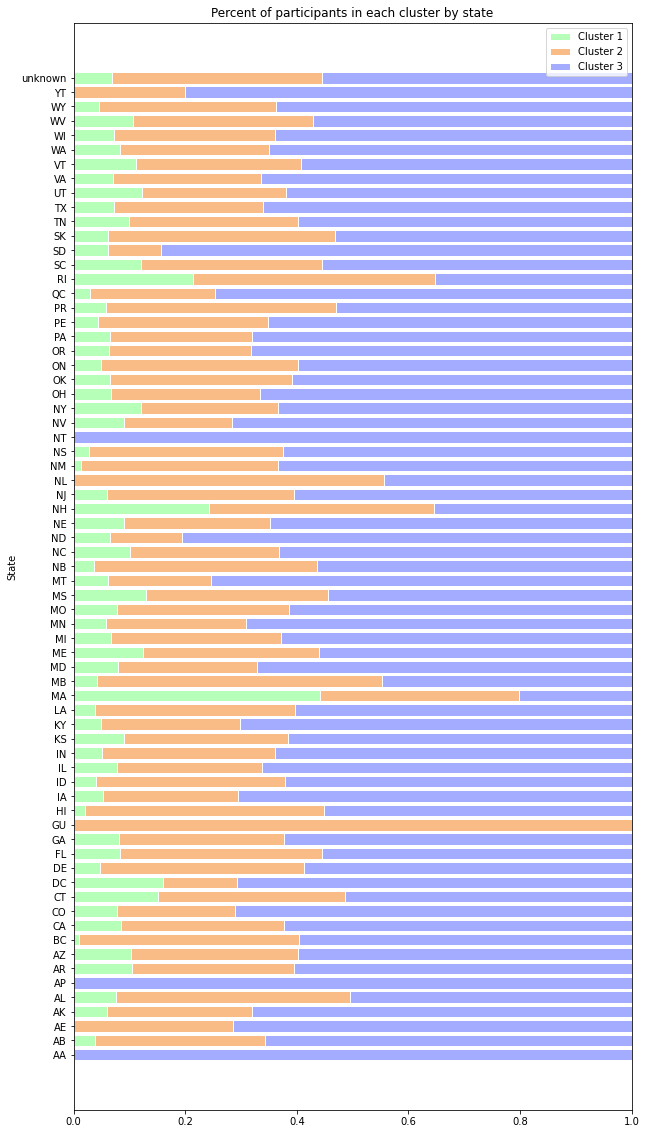

In [ ]:
plt.figure(figsize=(10, 20))

# Create cluster_1 bars
plt.barh(states.state, states.cluster_1, color='#b5ffb9', edgecolor='white', label='Cluster 1')
# Create cluster_2 bars
plt.barh(states.state, states.cluster_2, left=list(states.cluster_1), color='#f9bc86', 
         edgecolor='white', label='Cluster 2')
# Create cluster_3 bars
plt.barh(states.state, states.cluster_3, left=[i+j for i,j in zip(states.cluster_1, 
        states.cluster_2)], color='#a3acff', edgecolor='white', label='Cluster 3')
 
plt.yticks(range(len(states.index)), states.state)
plt.ylabel("State")
plt.title('Percent of participants in each cluster by state')
plt.legend()
plt.show()

From the above plot, there's one interesting observation that stands out: the vast majority of participants in each state fall into cluster 3, the fastest group. However, Massachusetts and its most proximate two states, New Hampshire and Rhode Island, saw much higher rates of participation in clusters 1 and 2.

I believe the story behind this is: people who are travelling from out of state to participate are going to be very serious about running. The bar to entry for local Bostonians and Massachusettsans is much lower, so many casual runners and such may join as a fun local activity. It's an interesting distinction the model makes, especially as I did not feed the 'state' column to my clustering model.

There are a few outlier "states," in which all points are only in one cluster. I have a feeling that these are caused by small sample sizes from these states, so I want to check into that:

##Country

In [ ]:
countries = pd.DataFrame()
countries['country'] = sorted(boston2014.country.unique())
countries['cluster_1'] = np.array(boston2014[boston2014['cluster']==1].groupby('country').count()['cluster'] / boston2014.groupby('country').count()['cluster'])
countries['cluster_2'] = np.array(boston2014[boston2014['cluster']==2].groupby('country').count()['cluster'] / boston2014.groupby('country').count()['cluster'])
countries['cluster_3'] = np.array(boston2014[boston2014['cluster']==3].groupby('country').count()['cluster'] / boston2014.groupby('country').count()['cluster'])
countries.fillna(0, inplace=True)
countries.head()

,country,cluster_1,cluster_2,cluster_3
0,ARG,0.000000,0.266667,0.733333
1,AUS,0.056452,0.290323,0.653226
2,AUT,0.045455,0.636364,0.318182
3,BAH,0.000000,1.000000,0.000000
4,BAR,0.000000,1.000000,0.000000


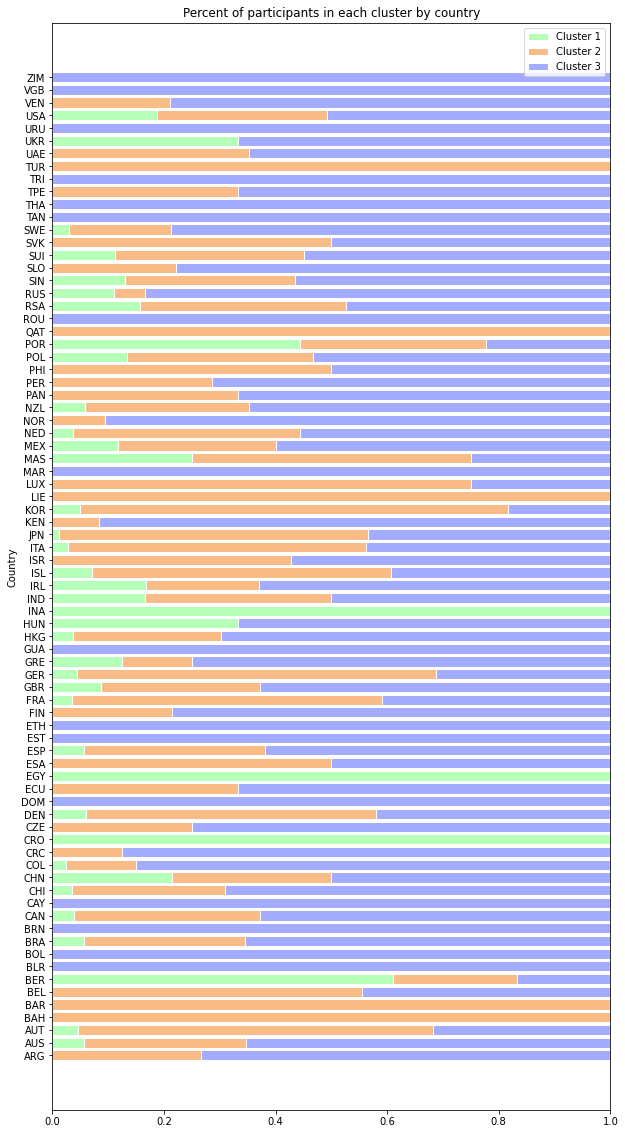

In [ ]:
plt.figure(figsize=(10, 20))

# Create cluster_1 bars
plt.barh(countries.country, countries.cluster_1, color='#b5ffb9', edgecolor='white', 
         label='Cluster 1')
# Create cluster_2 bars
plt.barh(countries.country, countries.cluster_2, left=list(countries.cluster_1), 
         color='#f9bc86', edgecolor='white', label='Cluster 2')
# Create cluster_3 bars
plt.barh(countries.country, countries.cluster_3, left=[i+j for i,j in zip(countries.cluster_1, 
        countries.cluster_2)], color='#a3acff', edgecolor='white', label='Cluster 3')
 
plt.yticks(range(len(countries.index)), countries.country)
plt.ylabel("Country")
plt.title('Percent of participants in each cluster by country')
plt.legend()
plt.show()

There is a much wider variety of distributions in the countries plot than the US states plot we looked at before this. Cluster 3 obviously has the highest percentage of global participants, but there are many countries with only participants in clusters 1 or 2. On average, cluster 1 has the least participants, probably because it's expensive to travel and at a younger age, people are likely to have less money. 

For the countries with only values in one cluster, I'm curious to see if that can be explained by runner counts: